In [5]:
!pip install gpxpy
!pip install geopy
!pip install geotiler
import gpxpy as gp
import pandas as pd
import io
from geopy import distance as dt
import numpy as np
import matplotlib.pyplot as pt
import geotiler as gt
import nest_asyncio as na

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   ---------------------------- ----------- 30.7/42.6 kB 186.2 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 229.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 435.7 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 738.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/371.5 kB ? eta -:--:--
     - ------------------

ModuleNotFoundError: No module named 'gpxpy'

# Задача 1, пункт 2

In [2]:
with open("14-окт.-2024-2038.gpx", encoding = "utf_8") as gpx_file:
    gpx = pd.read_xml(io.StringIO(gp.parse(gpx_file).to_xml()), xpath = "./*/*/*", namespaces = {"ele": "http://www.topografix.com/GPX/1/1"}, names = ["latitude", "longitude", "elevation", "timestamp"])
gpx # Это наверное самый сложный момент во всей дзшке. Сначала всё идёт нетрудно, конструкцией with мы
    # открываем файл, дальше обрабатываем функцией parse из модуля, про который нам сказали, дальше функцией to_xml преобразуем его в xml файл, чтобы дальше сделать из него датафрейм. В данном месте xml
    # файл находится в виде строки. В документации пандаса просят на вход функции read_xml подавать не простые строки, а особые строки StringIO. Поэтому я использую этот формат. Дальше начинается то, что
    # понять крайне тяжело, а именно параметры xpath и namespaces. Если их указать неверно, то и считываение файла будет неверное. Параметр xpath отвечает за тег, с которого будет считываться xml файл.
    # Xml файл представляет собой систему вложенных тегов, по умолчанию считывается тег, на уровень ниже самого выского. Однако в нашем случае это не подходит и с помощью xpath мы спускаемся на несколько
    # уровней ниже. "." означает текущий тег (самый высокий), "/" - спуск на уровень ниже, "*" - любой тег на данном уровне, то есть я спускаюсь на три уровня. Дальше идёт параметр namespaces, который
    # должен возвращать тегам их нормальные названия. Дело в том, что теги в xml файле не всегда имеют те имена, которые у них там написаны. Иногда в самом верхнем теге при помощи ссылок названия тегов
    # меняются. Делается это при помощи указания словаря.

,latitude,longitude,elevation,timestamp
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z
...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z


# Задача 1, пункт 3

In [3]:
gpx["distance"] = [0] + [np.nan]*(len(gpx) - 1) # Создаём новую колонку для того, чтобы понять, какое расстояние было пройдено между предыдущей и текущей точкой. В начало ставим 0 просто чтобы было
gpx                                             # начальное значение

,latitude,longitude,elevation,timestamp,distance
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.0
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,NaN
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,NaN
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,NaN
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,NaN
...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,NaN
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,NaN
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,NaN
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,NaN


In [4]:
for i in range(1, len(gpx)):
    gpx.iloc[i, 4] = dt.distance((gpx.iloc[i, 0], gpx.iloc[i, 1]), (gpx.iloc[i - 1, 0], gpx.iloc[i - 1, 1])).m # По методу, данному в самом задании, вычисляем расстояние между данной и предыдущей точкой
gpx

,latitude,longitude,elevation,timestamp,distance
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.000000
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,0.000000
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,6.982938
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,4.654784
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,13.347699
...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,3.185323
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,2.664024
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,2.748326
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,2.712891


# Задача 1, пункт 4

In [5]:
def time_count(time1, time2): # Задаём функцию, считающую разницу во времени
    def time_change(time_long): # Эта функция в функции преобразует данный нам формат времени просто в число секунд
        time_long = time_long.split("T")[1][:-1] # Режем время по букве Т, берём вторую часть собственно со временем, отрезаем букву Z
        time_long = time_long.split(":") # Режем по двоеточиям
        time_long = int(time_long[0])*60**2 + int(time_long[1])*60 + int(time_long[2]) # Преобразуем в числа, а дальше эти числа приводим к секундам
        return(time_long) # Возвращаем число секунд
    return(time_change(time2) - time_change(time1)) # Возвращаем разницу во времени

In [6]:
gpx["time_change"] = [0] + [np.nan]*(len(gpx) - 1) # Далее действуем так же, как в предыдущем задании
gpx

,latitude,longitude,elevation,timestamp,distance,time_change
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.000000,0.0
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,0.000000,NaN
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,6.982938,NaN
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,4.654784,NaN
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,13.347699,NaN
...,...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,3.185323,NaN
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,2.664024,NaN
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,2.748326,NaN
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,2.712891,NaN


In [7]:
for i in range(1, len(gpx)):
    gpx.iloc[i, 5] = time_count(gpx.iloc[i - 1, 3], gpx.iloc[i, 3])
gpx

,latitude,longitude,elevation,timestamp,distance,time_change
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.000000,0.0
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,0.000000,1.0
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,6.982938,2.0
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,4.654784,1.0
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,13.347699,1.0
...,...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,3.185323,2.0
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,2.664024,2.0
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,2.748326,2.0
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,2.712891,2.0


# Задача 1, пункт 5

In [8]:
gpx["pace"] = gpx["time_change"]/gpx["distance"]*1000/60 # Считаем темп по методу, данному в задании
gpx

,latitude,longitude,elevation,timestamp,distance,time_change,pace
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.000000,0.0,NaN
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,0.000000,1.0,inf
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,6.982938,2.0,4.773540
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,4.654784,1.0,3.580545
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,13.347699,1.0,1.248655
...,...,...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,3.185323,2.0,10.464664
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,2.664024,2.0,12.512398
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,2.748326,2.0,12.128593
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,2.712891,2.0,12.287016


# Задача 1, пункт 6

In [9]:
gpx["cumdist"] = np.cumsum(gpx["distance"]) # Считаем кумулятивное пройденное расстояние с помощью функции, данной в задании
gpx

,latitude,longitude,elevation,timestamp,distance,time_change,pace,cumdist
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.000000,0.0,NaN,0.000000
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,0.000000,1.0,inf,0.000000
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,6.982938,2.0,4.773540,6.982938
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,4.654784,1.0,3.580545,11.637723
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,13.347699,1.0,1.248655,24.985421
...,...,...,...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,3.185323,2.0,10.464664,996.365340
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,2.664024,2.0,12.512398,999.029364
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,2.748326,2.0,12.128593,1001.777691
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,2.712891,2.0,12.287016,1004.490582


# Задание 1, пункт 7

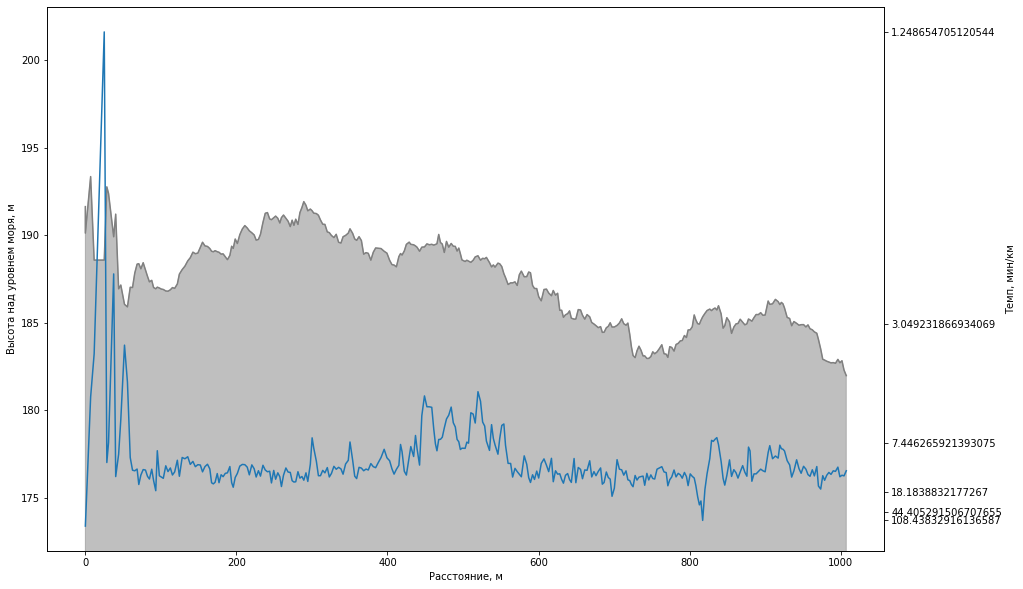

In [10]:
fig, ax1 = pt.subplots(figsize = (15, 10)) # Задаём картинку
ax2 = ax1.twinx() # Делаем две оси у
ax1.plot(gpx["cumdist"], gpx["elevation"], color = "grey") # Строим график высоты
ax1.fill_between(gpx["cumdist"], gpx["elevation"], alpha = 0.5, color = "grey") # Строим заполнение графика, делается аналогично простому графику. Параметр альфа отвечает за прозрачность
ax1.set_ylim(bottom = min(gpx["elevation"]) - 10) # Ограничиваем ось у графика высоты снизу, чтобы было лучше видно
ax2.plot(gpx["cumdist"], 1/gpx["pace"]) # Строим график обратного темпа (то есть скорости)
labels = np.geomspace(min(gpx.iloc[2:, 6]), max(gpx.iloc[2:, 6]), num = 6) # Выбираем новые подписи на оси у для темпа, так как несмотря на то, что мы сделали график скорости, нам надо оставить подписи
locs = 1/labels                                                            # именно темпа. Далее выбираем места, где будут данные подписи. Места уже должны соответствовать скорости, так как мы развернули
ax2.set_yticks(locs)                                                       # график. Далее мы подаём места и подписи графику
ax2.set_yticklabels(labels)
ax1.set_xlabel("Расстояние, м")
ax1.set_ylabel("Высота над уровнем моря, м")
ax2.set_ylabel("Темп, мин/км")
pt.show()

# Задание 1, пункт 8

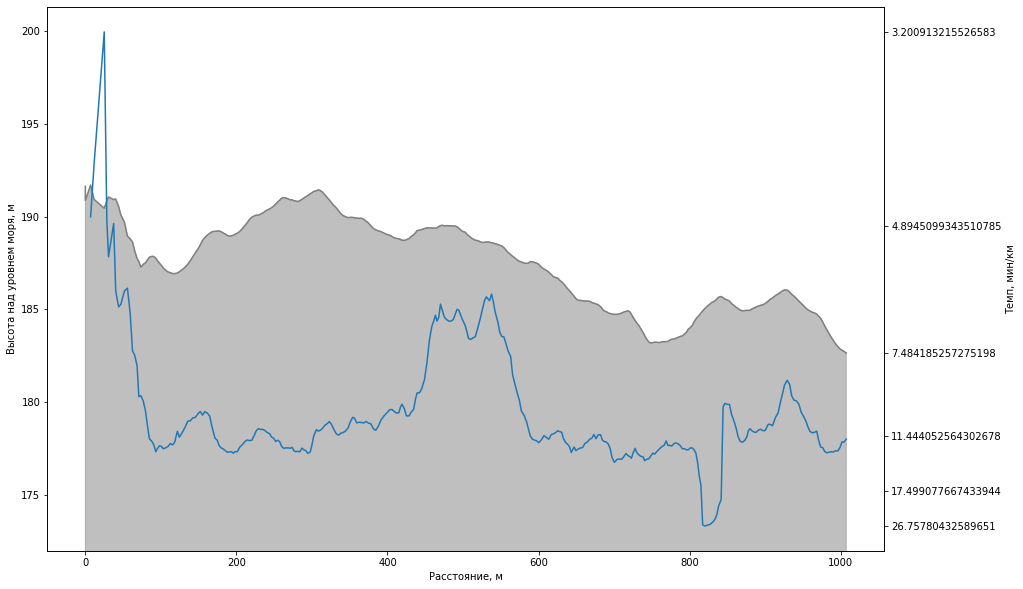

In [11]:
fig, ax1 = pt.subplots(figsize = (15, 10)) # Абсолютно аналогично предыдущему заданию, но используем дополнительно скользящее среднее, как указано в задании
ax2 = ax1.twinx()
ax1.plot(gpx["cumdist"], gpx["elevation"].rolling(10, min_periods = 1).mean(), color = "grey")
ax1.fill_between(gpx["cumdist"], gpx["elevation"].rolling(10, min_periods = 1).mean(), alpha = 0.5, color = "grey")
ax1.set_ylim(bottom = min(gpx["elevation"]) - 10)
gpx["pace_rol_mean"] = gpx["pace"].rolling(10, min_periods = 1).mean()
ax2.plot(gpx["cumdist"], 1/gpx["pace_rol_mean"])
labels = np.geomspace(min(gpx.iloc[2:, 6].rolling(10, min_periods = 1).mean()), max(gpx.iloc[2:, 6].rolling(10, min_periods = 1).mean()), num = 6)
locs = 1/labels
ax2.set_yticks(locs)
ax2.set_yticklabels(labels)
ax1.set_xlabel("Расстояние, м")
ax1.set_ylabel("Высота над уровнем моря, м")
ax2.set_ylabel("Темп, мин/км")
pt.show()

# Задание 1, пункт 9

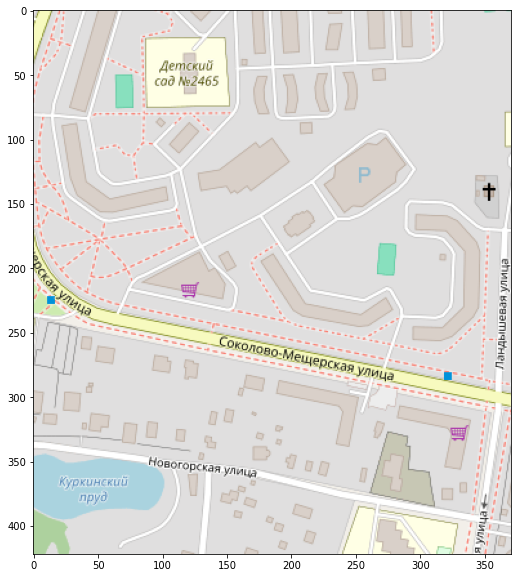

In [12]:
na.apply() # В данном задании требуется костыль, про который ничего не говорится в самом задании. Связано это с тем, что карта вычисляется асинхронно, что входит в какое-то противоречие с юпитером
geo_map = gt.Map(extent = (min(gpx["longitude"]), min(gpx["latitude"]), max(gpx["longitude"]), max(gpx["latitude"])), zoom = 16) # Задаём карту, как указано в задании
img = gt.render_map(geo_map) # Рендерим карту как указано в задании
pt.figure(figsize = (15, 10)) # Рисуем карту немного иначе, чем указано в задании, так как там слишком сложно описано, как по мне, можно сделать проще
pt.imshow(img)
pt.show()

# Задание 1, пункт 10

In [13]:
gpx[["img_lat", "img_lon"]] = gpx[["longitude", "latitude"]].apply(geo_map.rev_geocode, 1, result_type = "expand") # Ещё один подставной момент. Функция rev_geocode получает на вход широту и долготу, а
gpx                                                                                                                # выдаёт наоборот долготу и широту (в обратном порядке). Про это нигде не сказано, из-за
                                                                                                                   # чего не сразу сообразишь, почему ничего нормально не считается, если делать всё
                                                                                                                   # интуитивно

,latitude,longitude,elevation,timestamp,distance,time_change,pace,cumdist,pace_rol_mean,img_lat,img_lon
0,55.892417,37.386432,191.630465,2024-10-14T17:27:30Z,0.000000,0.0,NaN,0.000000,NaN,31.496095,5.637703
1,55.892417,37.386432,190.118013,2024-10-14T17:27:31Z,0.000000,1.0,inf,0.000000,NaN,31.496095,5.637703
2,55.892462,37.386355,193.345369,2024-10-14T17:27:33Z,6.982938,2.0,4.773540,6.982938,4.773540,27.910158,1.862056
3,55.892426,37.386391,188.577120,2024-10-14T17:27:34Z,4.654784,1.0,3.580545,11.637723,4.177042,29.625002,4.881877
4,55.892470,37.386193,188.578035,2024-10-14T17:27:35Z,13.347699,1.0,1.248655,24.985421,3.200913,20.367189,1.249035
...,...,...,...,...,...,...,...,...,...,...,...
342,55.887501,37.393350,182.911282,2024-10-14T17:38:09Z,3.185323,2.0,10.464664,996.365340,12.628398,353.937502,414.175608
343,55.887478,37.393339,182.717420,2024-10-14T17:38:11Z,2.664024,2.0,12.512398,999.029364,12.338768,353.417970,416.094535
344,55.887453,37.393336,182.833415,2024-10-14T17:38:13Z,2.748326,2.0,12.128593,1001.777691,11.884569,353.250002,418.138834
345,55.887429,37.393334,182.299993,2024-10-14T17:38:15Z,2.712891,2.0,12.287016,1004.490582,11.889136,353.175783,420.162237


# Задание 1, пункт 11

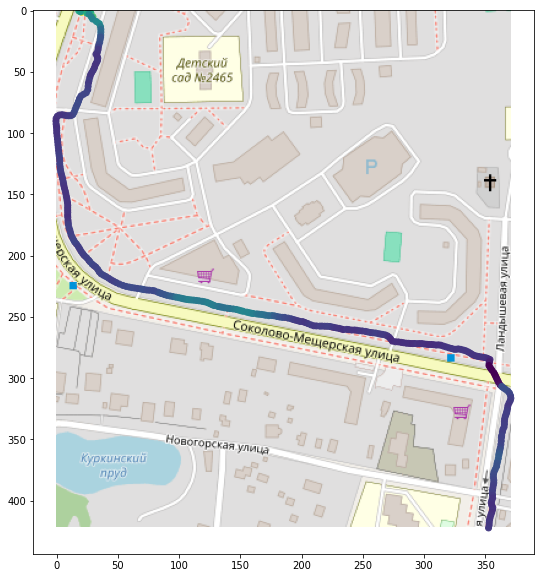

In [14]:
pt.figure(figsize = (15, 10)) # Здесь делаем всё в целом как в условии, картинку и скаттер просто друг за другом подаём. Также я отрезал первые две строки в таблице, так как там были левые значения
pt.imshow(img)                # типа нанов и бесконечностей
colors = (100*(gpx.pace_rol_mean[2:].min()/gpx.pace_rol_mean[2:])*(gpx.pace_rol_mean[2:].max() - gpx.pace_rol_mean[2:])/(gpx.pace_rol_mean[2:].max() - gpx.pace_rol_mean[2:].min())).astype(int)
pt.scatter(gpx["img_lat"][2:], gpx["img_lon"][2:], c = colors)
pt.show()